In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import math
from skimage import filters
from skimage import feature

import skimage
import skimage.io as io

from skimage.color import rgb2gray
from skimage.segmentation import felzenszwalb, quickshift
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

In [2]:
def calculateDistance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def calculateIdealLowPassFilter(D0,imgShape):
    lowPassScpectrum = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if calculateDistance((y,x),center) < D0:
                lowPassScpectrum[y,x] = 1
    return lowPassScpectrum

def low_pass(img):   
  
    original = np.fft.fft2(img)
    center = np.fft.fftshift(original)
    LowPassCenter =  center * calculateIdealLowPassFilter(30,img.shape)

    LowPass = np.fft.ifftshift(LowPassCenter)
    inverse_LowPass = np.fft.ifft2(LowPass)   

    return np.abs(inverse_LowPass)

In [3]:
def calculateDistance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def calculateButterworthHightPassFilter(D0,imgShape,n):
    hightPassScpectrum = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            hightPassScpectrum[y,x] = 1-1/(1+(calculateDistance((y,x),center)/D0)**(2*n))
    return hightPassScpectrum

def high_pass(img):   
  
    original = np.fft.fft2(img)
    center = np.fft.fftshift(original)

    HighPassCenter = center * calculateButterworthHightPassFilter(30,img.shape,2)
    HighPass = np.fft.ifftshift(HighPassCenter)
    inverse_HighPass = np.fft.ifft2(HighPass)  

    return np.abs(inverse_HighPass)


In [4]:
def super_pixel(input):

    img = input
    segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)  
    a=mark_boundaries(img, segments_fz)    
    c1=a[:,:,2]
    c2=a[:,:,1]
    c3=a[:,:,0]
    return c1,c2,c3


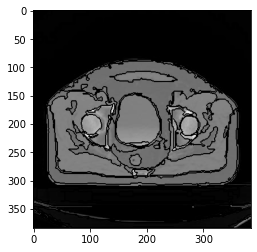

In [5]:
a=cv2.imread("CT/"+str(1)+".jpeg")
b=cv2.imread("MRI/"+str(1)+".jpeg")
c=plt.imread("RESULT/"+str(1)+".tif")

# MRI - CT images
ct_images = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
mr_images = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)

#Features1
edge_sobel_mr = filters.sobel(mr_images).reshape(-1,1)
edge_sobel_ct=filters.sobel(ct_images).reshape(-1,1)

#Feature2
edge_mr = feature.canny(mr_images).reshape(-1,1)
edge_ct=feature.canny(ct_images).reshape(-1,1)

#Feature3 Low Pass Filter
low_pass_mr=low_pass(mr_images).reshape(-1,1)
low_pass_ct=low_pass(ct_images).reshape(-1,1)

#Feature4 High Pass Filter
#high_pass_mr=high_pass(mr_images).reshape(-1,1)
#high_pass_ct=high_pass(ct_images).reshape(-1,1)

#Feature SuperPixel

pixel1_mr,pixel2_mr,pixel3_mr=super_pixel(mr_images)
pixel1_ct,pixel2_ct,pixel3_ct=super_pixel(ct_images)

pixel1_mr=pixel1_mr.reshape(-1,1)
pixel2_mr=pixel2_mr.reshape(-1,1)
pixel3_mr=pixel3_mr.reshape(-1,1)

pixel1_ct=pixel1_ct.reshape(-1,1)
pixel2_ct=pixel2_ct.reshape(-1,1)
pixel3_ct=pixel3_ct.reshape(-1,1)
    
    
ct_images = ct_images.reshape(-1,1)
mr_images = mr_images.reshape(-1,1)
result_images = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY).reshape(-1,1)

plt.imshow(pixel1_mr.reshape(384,384),cmap="gray")




In [6]:

for i in range(2,6):
    a=cv2.imread("CT/"+str(i)+".jpeg")
    b=cv2.imread("MRI/"+str(i)+".jpeg")
    c=plt.imread("RESULT/"+str(i)+".tif")
    
    
    a = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    b = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
    c = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY).reshape(-1,1)
    
    #Features1
    d = filters.sobel(b).reshape(-1,1)
    e=filters.sobel(a).reshape(-1,1)

    #Feature2
    g = feature.canny(b).reshape(-1,1)
    h=feature.canny(a).reshape(-1,1)
    
    #Feature3 Low Pass Filter
    x=low_pass(b).reshape(-1,1)
    y=low_pass(a).reshape(-1,1)
    
    
    #Feature SuperPixel

    s1_mr,s2_mr,s3_mr=super_pixel(b)
    s1_ct,s2_ct,s3_ct=super_pixel(a)
    
    s1_mr=s1_mr.reshape(-1,1)
    s2_mr=s2_mr.reshape(-1,1)
    s3_mr=s3_mr.reshape(-1,1)
    
    s1_ct=s1_ct.reshape(-1,1)
    s2_ct=s2_ct.reshape(-1,1)
    s3_ct=s3_ct.reshape(-1,1)
    
    
    a=a.reshape(-1,1)
    b=b.reshape(-1,1)
    
    ct_images=np.concatenate((ct_images, a), axis=0)
    mr_images=np.concatenate((mr_images, b), axis=0)
    result_images=np.concatenate((result_images, c), axis=0)   
    
    edge_sobel_mr=np.concatenate((edge_sobel_mr, d), axis=0)
    edge_sobel_ct=np.concatenate((edge_sobel_ct, e), axis=0)
    
    edge_mr=np.concatenate((edge_mr, g), axis=0)
    edge_ct=np.concatenate((edge_ct, h), axis=0)
    
    low_pass_mr=np.concatenate((low_pass_mr, x), axis=0)
    low_pass_ct=np.concatenate((low_pass_ct, y), axis=0)
    
    pixel1_mr= np.concatenate((pixel1_mr, s1_mr), axis=0)
    pixel2_mr= np.concatenate((pixel2_mr, s2_mr), axis=0)
    pixel3_mr= np.concatenate((pixel3_mr, s3_mr), axis=0)
    
    pixel1_ct= np.concatenate((pixel1_ct, s1_ct), axis=0)
    pixel2_ct= np.concatenate((pixel2_ct, s2_ct), axis=0)
    pixel3_ct= np.concatenate((pixel3_ct, s3_ct), axis=0)
    
    

print(ct_images.shape)
print(mr_images.shape)
print(result_images.shape)
print(low_pass_mr.shape)
print(low_pass_ct.shape)

print(pixel1_mr.shape)
print(pixel2_mr.shape)
print(pixel3_mr.shape)
print(pixel1_ct.shape)
print(pixel2_ct.shape)
print(pixel3_ct.shape)

(737280, 1)
(737280, 1)
(737280, 1)
(737280, 1)
(737280, 1)
(737280, 1)
(737280, 1)
(737280, 1)
(737280, 1)
(737280, 1)
(737280, 1)


In [7]:
X=np.concatenate((mr_images,ct_images,
                  edge_sobel_mr,edge_sobel_ct,
                  edge_mr,edge_ct,
                  low_pass_mr,low_pass_ct,
                  pixel1_mr,pixel1_ct,
                  pixel2_mr,pixel2_ct,
                  pixel3_mr,pixel3_ct), axis=1)
y=result_images

In [8]:
X.shape



(737280, 14)

In [9]:
y.shape

(737280, 1)

In [10]:
test_x2=cv2.imread("MRI/4.jpeg") 
test_x=cv2.imread("CT/4.jpeg") 


#Test images
test_x = cv2.cvtColor(test_x, cv2.COLOR_BGR2GRAY)
test_x2 = cv2.cvtColor(test_x2, cv2.COLOR_BGR2GRAY)

#Feature Extraction 1
feature1_mr = filters.sobel(test_x2).reshape(-1,1)
feature1_ct=filters.sobel(test_x).reshape(-1,1)

#Feature Extraction 2
feature2_mr = feature.canny(test_x2).reshape(-1,1)
feature2_ct=feature.canny(test_x).reshape(-1,1)

#Feature3 Low Pass Filter
test_low_mr=low_pass(test_x2).reshape(-1,1)
test_low_ct=low_pass(test_x).reshape(-1,1)

#Feature SuperPixel

s1_mr,s2_mr,s3_mr=super_pixel(test_x2)
s1_ct,s2_ct,s3_ct=super_pixel(test_x)

s1_mr=s1_mr.reshape(-1,1)
s2_mr=s2_mr.reshape(-1,1)
s3_mr=s3_mr.reshape(-1,1)

s1_ct=s1_ct.reshape(-1,1)
s2_ct=s2_ct.reshape(-1,1)
s3_ct=s3_ct.reshape(-1,1)

test_x = test_x.reshape(-1,1)
test_x2 = test_x2.reshape(-1,1) 



#(ct_images, mr_images,edge_sobel_mr,edge_sobel_ct)
test=np.concatenate((test_x2,test_x,
                     feature1_mr,feature1_ct,
                     feature2_mr,feature2_ct,
                     test_low_mr,test_low_ct,
                     s1_mr,s1_ct,
                     s2_mr,s2_ct,
                     s3_mr,s3_ct), axis=1)

test_result=plt.imread("RESULT/4.tif")   
test_result = cv2.cvtColor(test_result, cv2.COLOR_BGR2GRAY).reshape(-1,1)

In [11]:
test.shape

(147456, 14)

In [12]:
test_result.shape

(147456, 1)

In [13]:
import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
from sklearn import preprocessing




classifier=Sequential()
classifier.add(Dense(12, activation="relu",input_dim=14))
classifier.add(Dense(8, activation="relu"))
classifier.add(Dense(6, activation="relu"))
classifier.add(Dense(3, activation="relu"))
classifier.add(Dense(6, activation="relu"))
classifier.add(Dense(8, activation="relu"))
classifier.add(Dense(1, activation="relu"))

classifier.compile(optimizer="adam",loss="mean_absolute_error",metrics=["accuracy"])

summary=classifier.fit(X,y,epochs=35,batch_size=120,validation_data=(test,test_result))



Epoch 1/35
6144/6144 [==============================] - 6s 945us/step - loss: 11.4875 - accuracy: 0.5967 - val_loss: 8.6080 - val_accuracy: 0.6413
Epoch 2/35
6144/6144 [==============================] - 6s 913us/step - loss: 10.3127 - accuracy: 0.6028 - val_loss: 7.9540 - val_accuracy: 0.6410
Epoch 3/35
6144/6144 [==============================] - 6s 953us/step - loss: 9.9684 - accuracy: 0.6024 - val_loss: 7.5570 - val_accuracy: 0.6418
Epoch 4/35
6144/6144 [==============================] - 6s 972us/step - loss: 9.6332 - accuracy: 0.6026 - val_loss: 7.0789 - val_accuracy: 0.6430
Epoch 5/35
6144/6144 [==============================] - 5s 879us/step - loss: 9.2496 - accuracy: 0.6039 - val_loss: 7.3133 - val_accuracy: 0.6432
Epoch 6/35
6144/6144 [==============================] - 6s 918us/step - loss: 8.9402 - accuracy: 0.6065 - val_loss: 6.6380 - val_accuracy: 0.6475
Epoch 7/35
6144/6144 [==============================] - 6s 953us/step - loss: 8.6780 - accuracy: 0.6089 - val_loss: 7.9092

In [14]:
y_pred=classifier.predict(test)
y_pred.shape

(147456, 1)

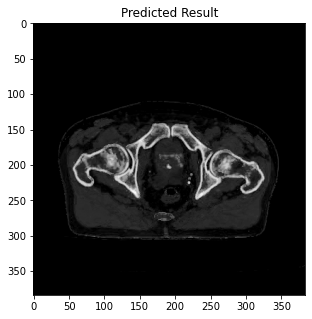

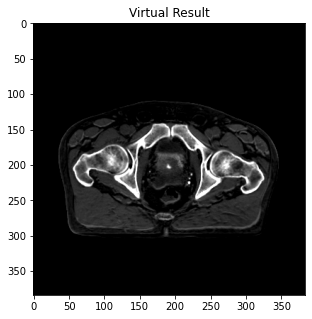

In [15]:
size=int(math.sqrt(len(y_pred)))
plt.figure(figsize=(5,5))
plt.title("Predicted Result")
plt.imshow(y_pred.reshape(size,size),cmap="gray")
plt.show()

plt.figure(figsize=(5,5))
plt.title("Virtual Result")
plt.imshow(test_result.reshape(size,size),cmap="gray")
plt.show()

In [16]:
print(np.unique(y_pred))

[0.0000000e+00 1.5032291e-04 2.8282404e-03 ... 3.1147046e+02 3.1540402e+02
 3.1696008e+02]


In [17]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_result, y_pred)

4.8485546

In [18]:
classifier.save("best_result.h5")

In [19]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 24        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9

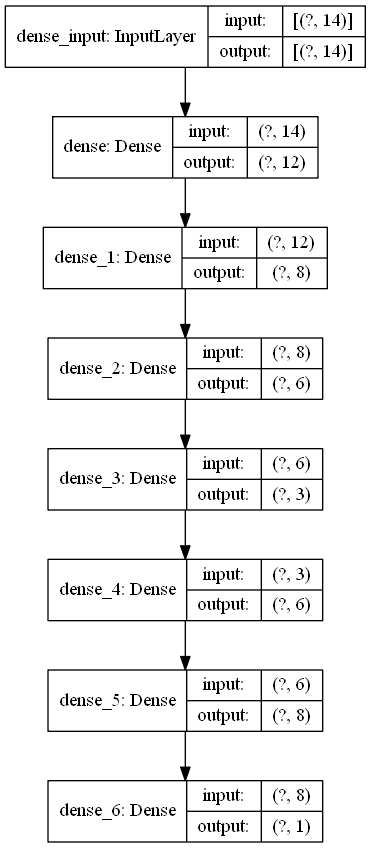

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, to_file='model1.png', show_shapes=True, show_layer_names=True)

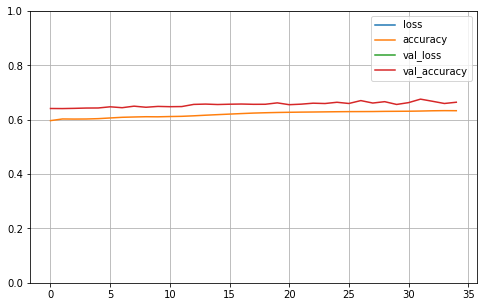

In [21]:
pd.DataFrame(summary.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [22]:
print("Error is : ",(mean_absolute_error(test_result, y_pred)/256) *100,"%")

Error is :  1.8939666450023651 %


In [23]:
print("Accuracy is : ",100 - (mean_absolute_error(test_result, y_pred)/256) *100,"%")

Accuracy is :  98.10603335499763 %
